<div style="text-align: center;">
  <img width="240" height="240" src="https://www.naterscreations.com/imputegap/logo_imputegab.png" />
</div>
<h1>ImputeGAP: Tutorial</h1>
<h4>ReCTSi</h4>





In [ ]:
%pip install imputegap==1.1.1

In [1]:
%pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
def imputegap_jupyter(matrix):
    df = pd.DataFrame(matrix).head(10).reset_index(drop=True)
    df.index += 1  # Start index at 1 instead of 0
    return df.style.format(precision=2)

# 2.&nbsp;Imputation

In this section, we will illustrate how to impute the contaminated time series using ReCTSi.

In [1]:
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils
ts = TimeSeries()

First, load the data:

In [ ]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset
ts.load_series(utils.search_path("airq"))
ts.normalize(normalizer="z_score")

# plot the recovered time series
ts.plot(input_data=ts.data)
%matplotlib inline
ts.plots.show()


(SYS) The dataset is loaded from /Users/aleja/Desktop/DS/ImputeGAP/imputegap/datasets/airq.txt

> logs: normalization (z_score) of the data - runtime: 0.0006 seconds

plots saved in: ./imputegap_assets/26_01_09_13_57_54_imputegap_plot.jpg


<br>

Second, contaminate the data:


(CONT) missigness pattern: MCAR
	selected series: 2, 9
	percentage of contaminated series: 20.0%
	rate of missing data per series: 20.0%
	block size: 10
	security offset: [0-100]
	seed value: 42

plots saved in: ./imputegap_assets/imputation/traffic/26_01_09_13_58_16_imputegap_plot.jpg


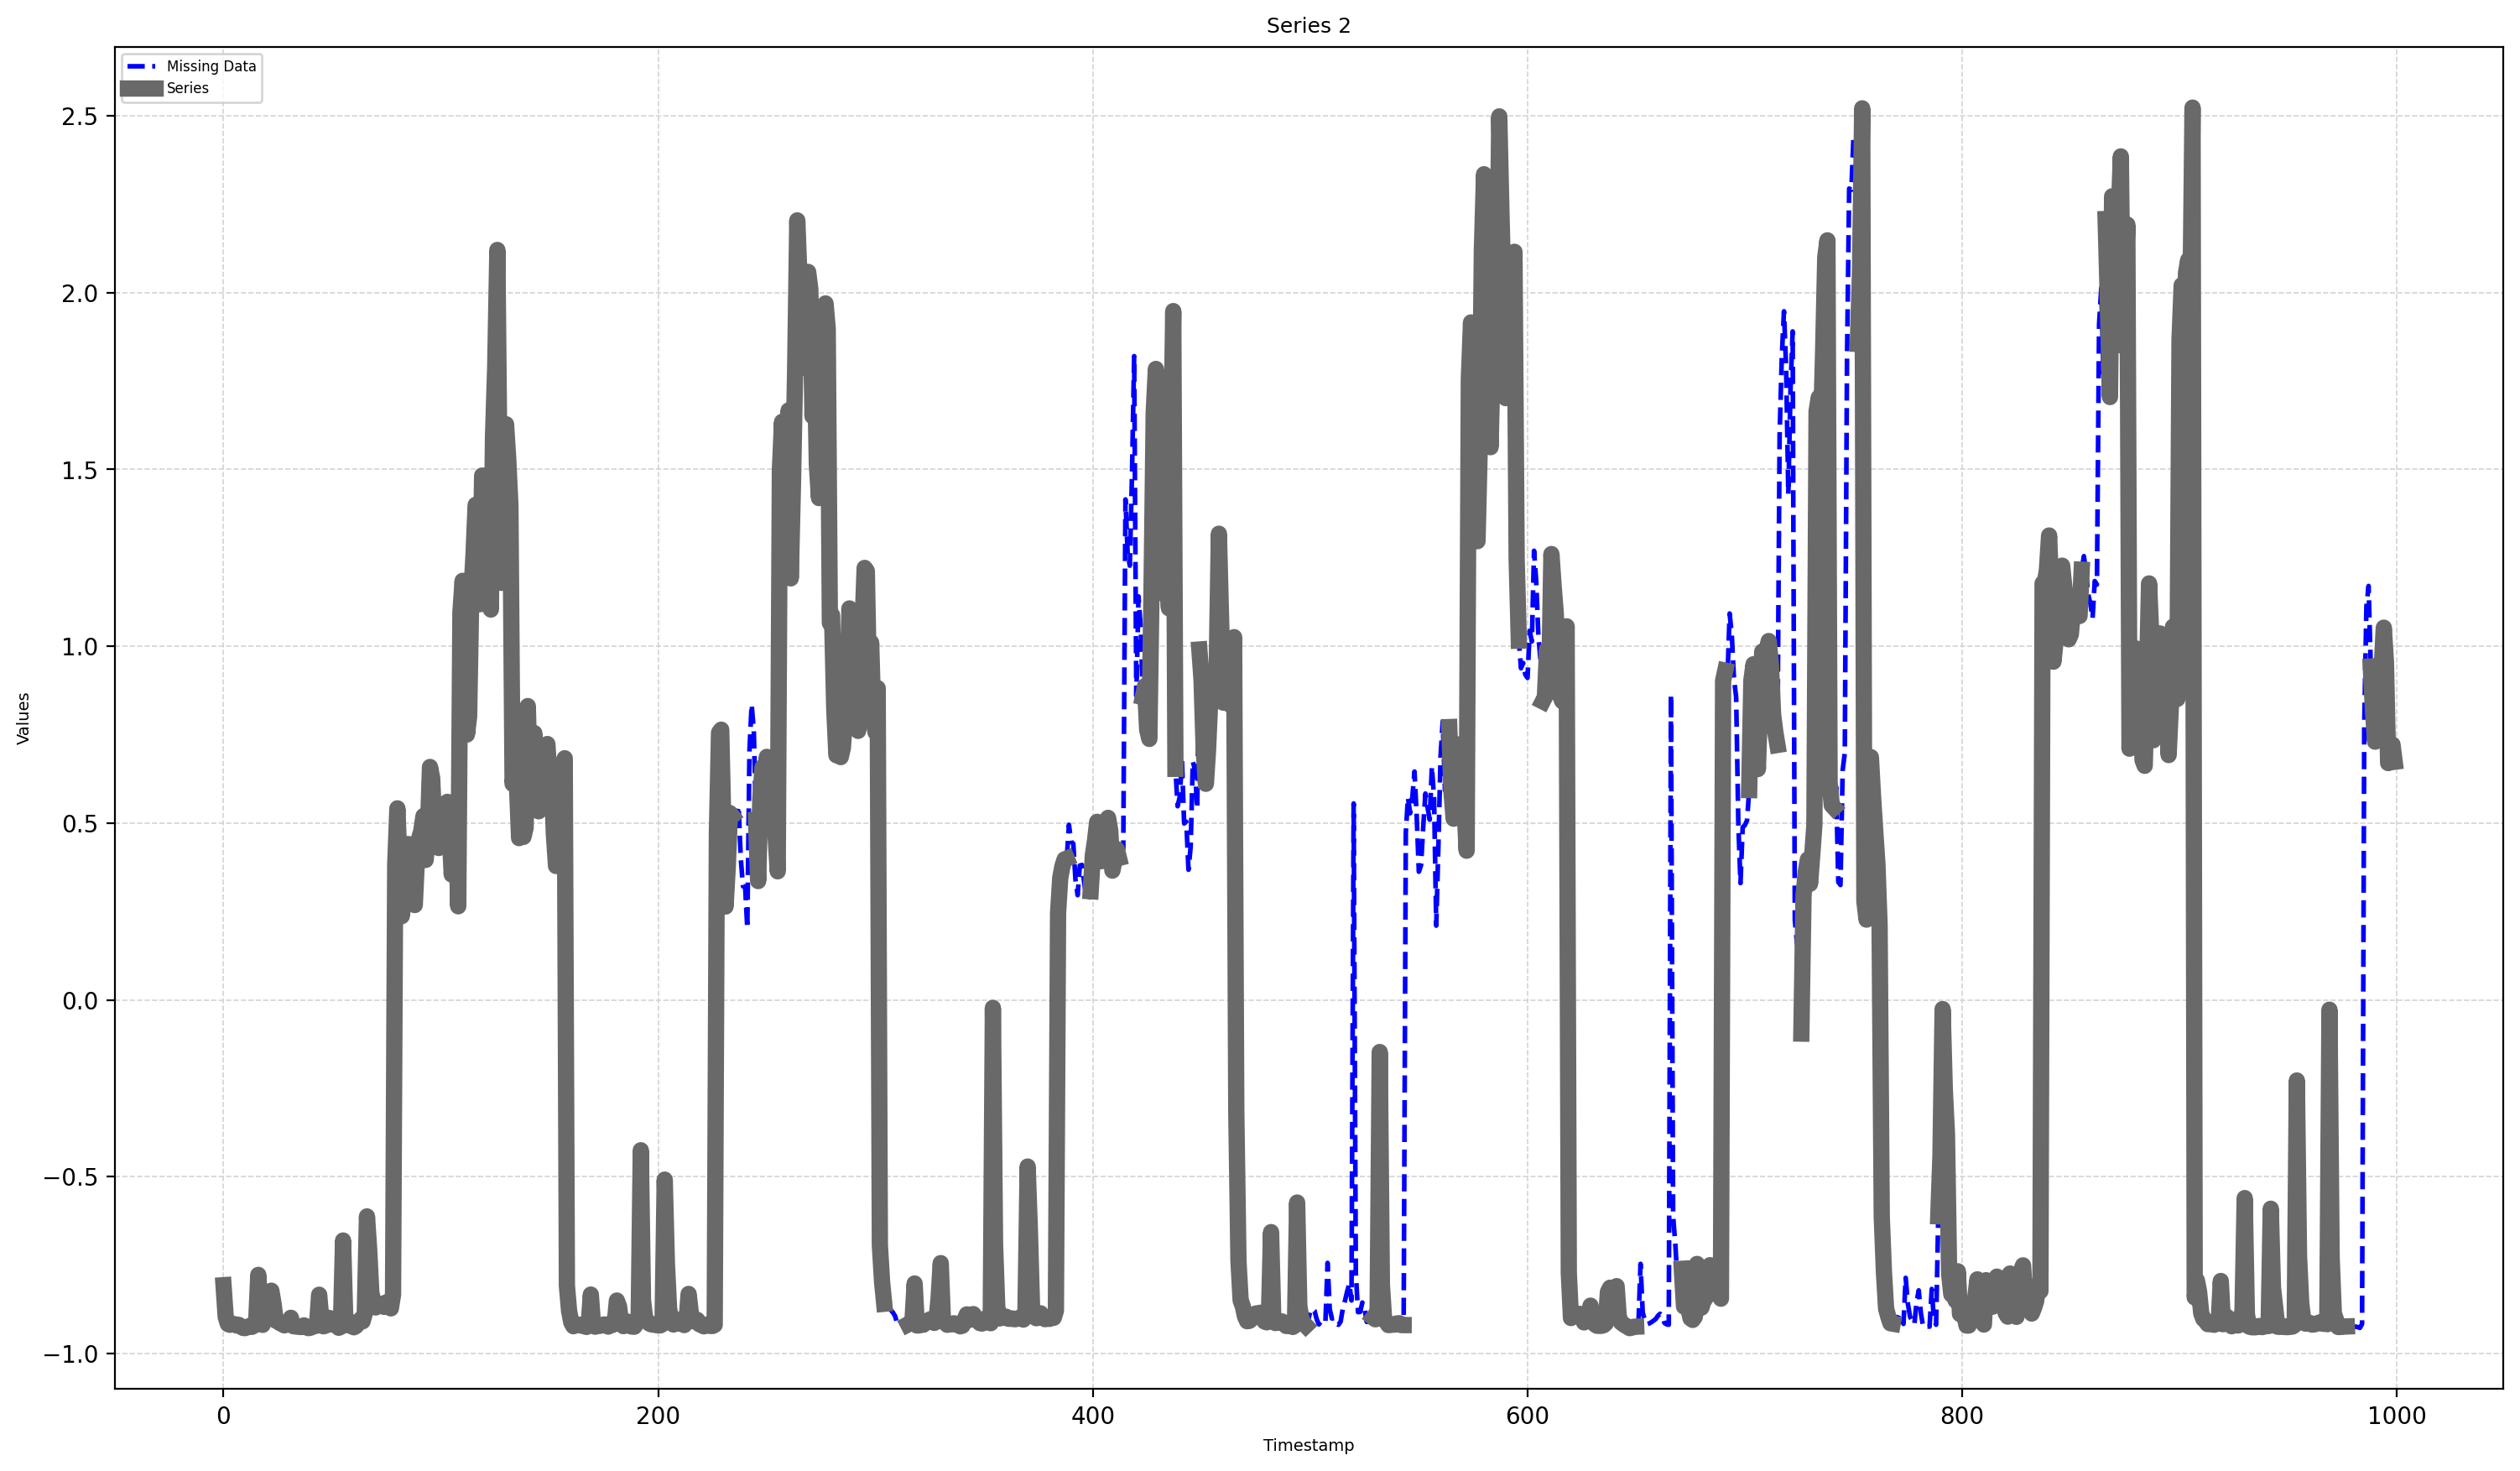

In [4]:
# contaminate the time series
ts_m = ts.Contamination.mcar(ts.data)
ts.plot(input_data=ts.data, incomp_data=ts_m, nbr_series=1, nbr_val=3000, subplot=True, save_path="./imputegap_assets/imputation/traffic")
%matplotlib inline
ts.plots.show()

<br>

Finally, impute the data:

Seed set to 42
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



(SYS) Inner files loaded :  /Users/aleja/Desktop/DS/ImputeGAP/imputegap/env/default_values.toml 

(Batch-Size) Computed batch size: 32


(IMPUTATION) ReCTSi
	Matrix: 10, 1000
	batch_size: 32
	lr: 0.0002
	window: 24
	patience: 10
	epochs: 100
	workers: 0

🔍 torch size: 977
🔍 Training Indices: 855
🔍 Test Indices: 977
🔍 Validation Indices: 98
ffn group 1
ffn group 1
 skip

training...


/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/aleja/Desktop/DS/ImputeGAP/imputegap/wrapper/AlgoPython/ReCTSi/logs/rectsi/2026-01-09_13-58-52_42 exists and is not empty.

  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | loss_fn       | MaskedMetric     | 0      | train
1 | train_metrics | MetricCollection | 0      | train
2 | val_metrics   | MetricCollection | 0      | train
3 | test_metrics  | MetricCollection | 0      | train
4 | model         | ReCTSINet        | 66.1 K | train
-----------------------------------------------------------
66.1 K    Trainable params
0         Non-trainable param

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Restoring states from the checkpoint path at /Users/aleja/Desktop/DS/ImputeGAP/imputegap/wrapper/AlgoPython/ReCTSi/logs/rectsi/2026-01-09_13-58-52_42/epoch=84-step=2210.ckpt
Loaded model weights from the checkpoint at /Users/aleja/Desktop/DS/ImputeGAP/imputegap/wrapper/AlgoPython/ReCTSi/logs/rectsi/2026-01-09_13-58-52_42/epoch=84-step=2210.ckpt



reconstruct...


/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_mae          │    0.2745068669319153     │
│         test_mape         │    0.2745068669319153     │
│         test_mre          │     35.0343017578125      │
│         test_mse          │    0.2745068669319153     │
└───────────────────────────┴───────────────────────────┘

y_hat.shape = (1000, 10)
🔍 y_hat shape before reshape: (1000, 10)
🔍 Expected input_data shape: (1000, 10)

> logs: imputation ReCTSi - Execution Time: 131.9986 seconds


Results :
RMSE                 = 0.33808474213951845
MAE                  = 0.2081487204313176
MI                   = 0.8562205283219311
CORRELATION          = 0.9420710627135689

plots saved in: ./imputegap_assets/imputation/26_01_09_14_01_04_rectsi_plot.jpg


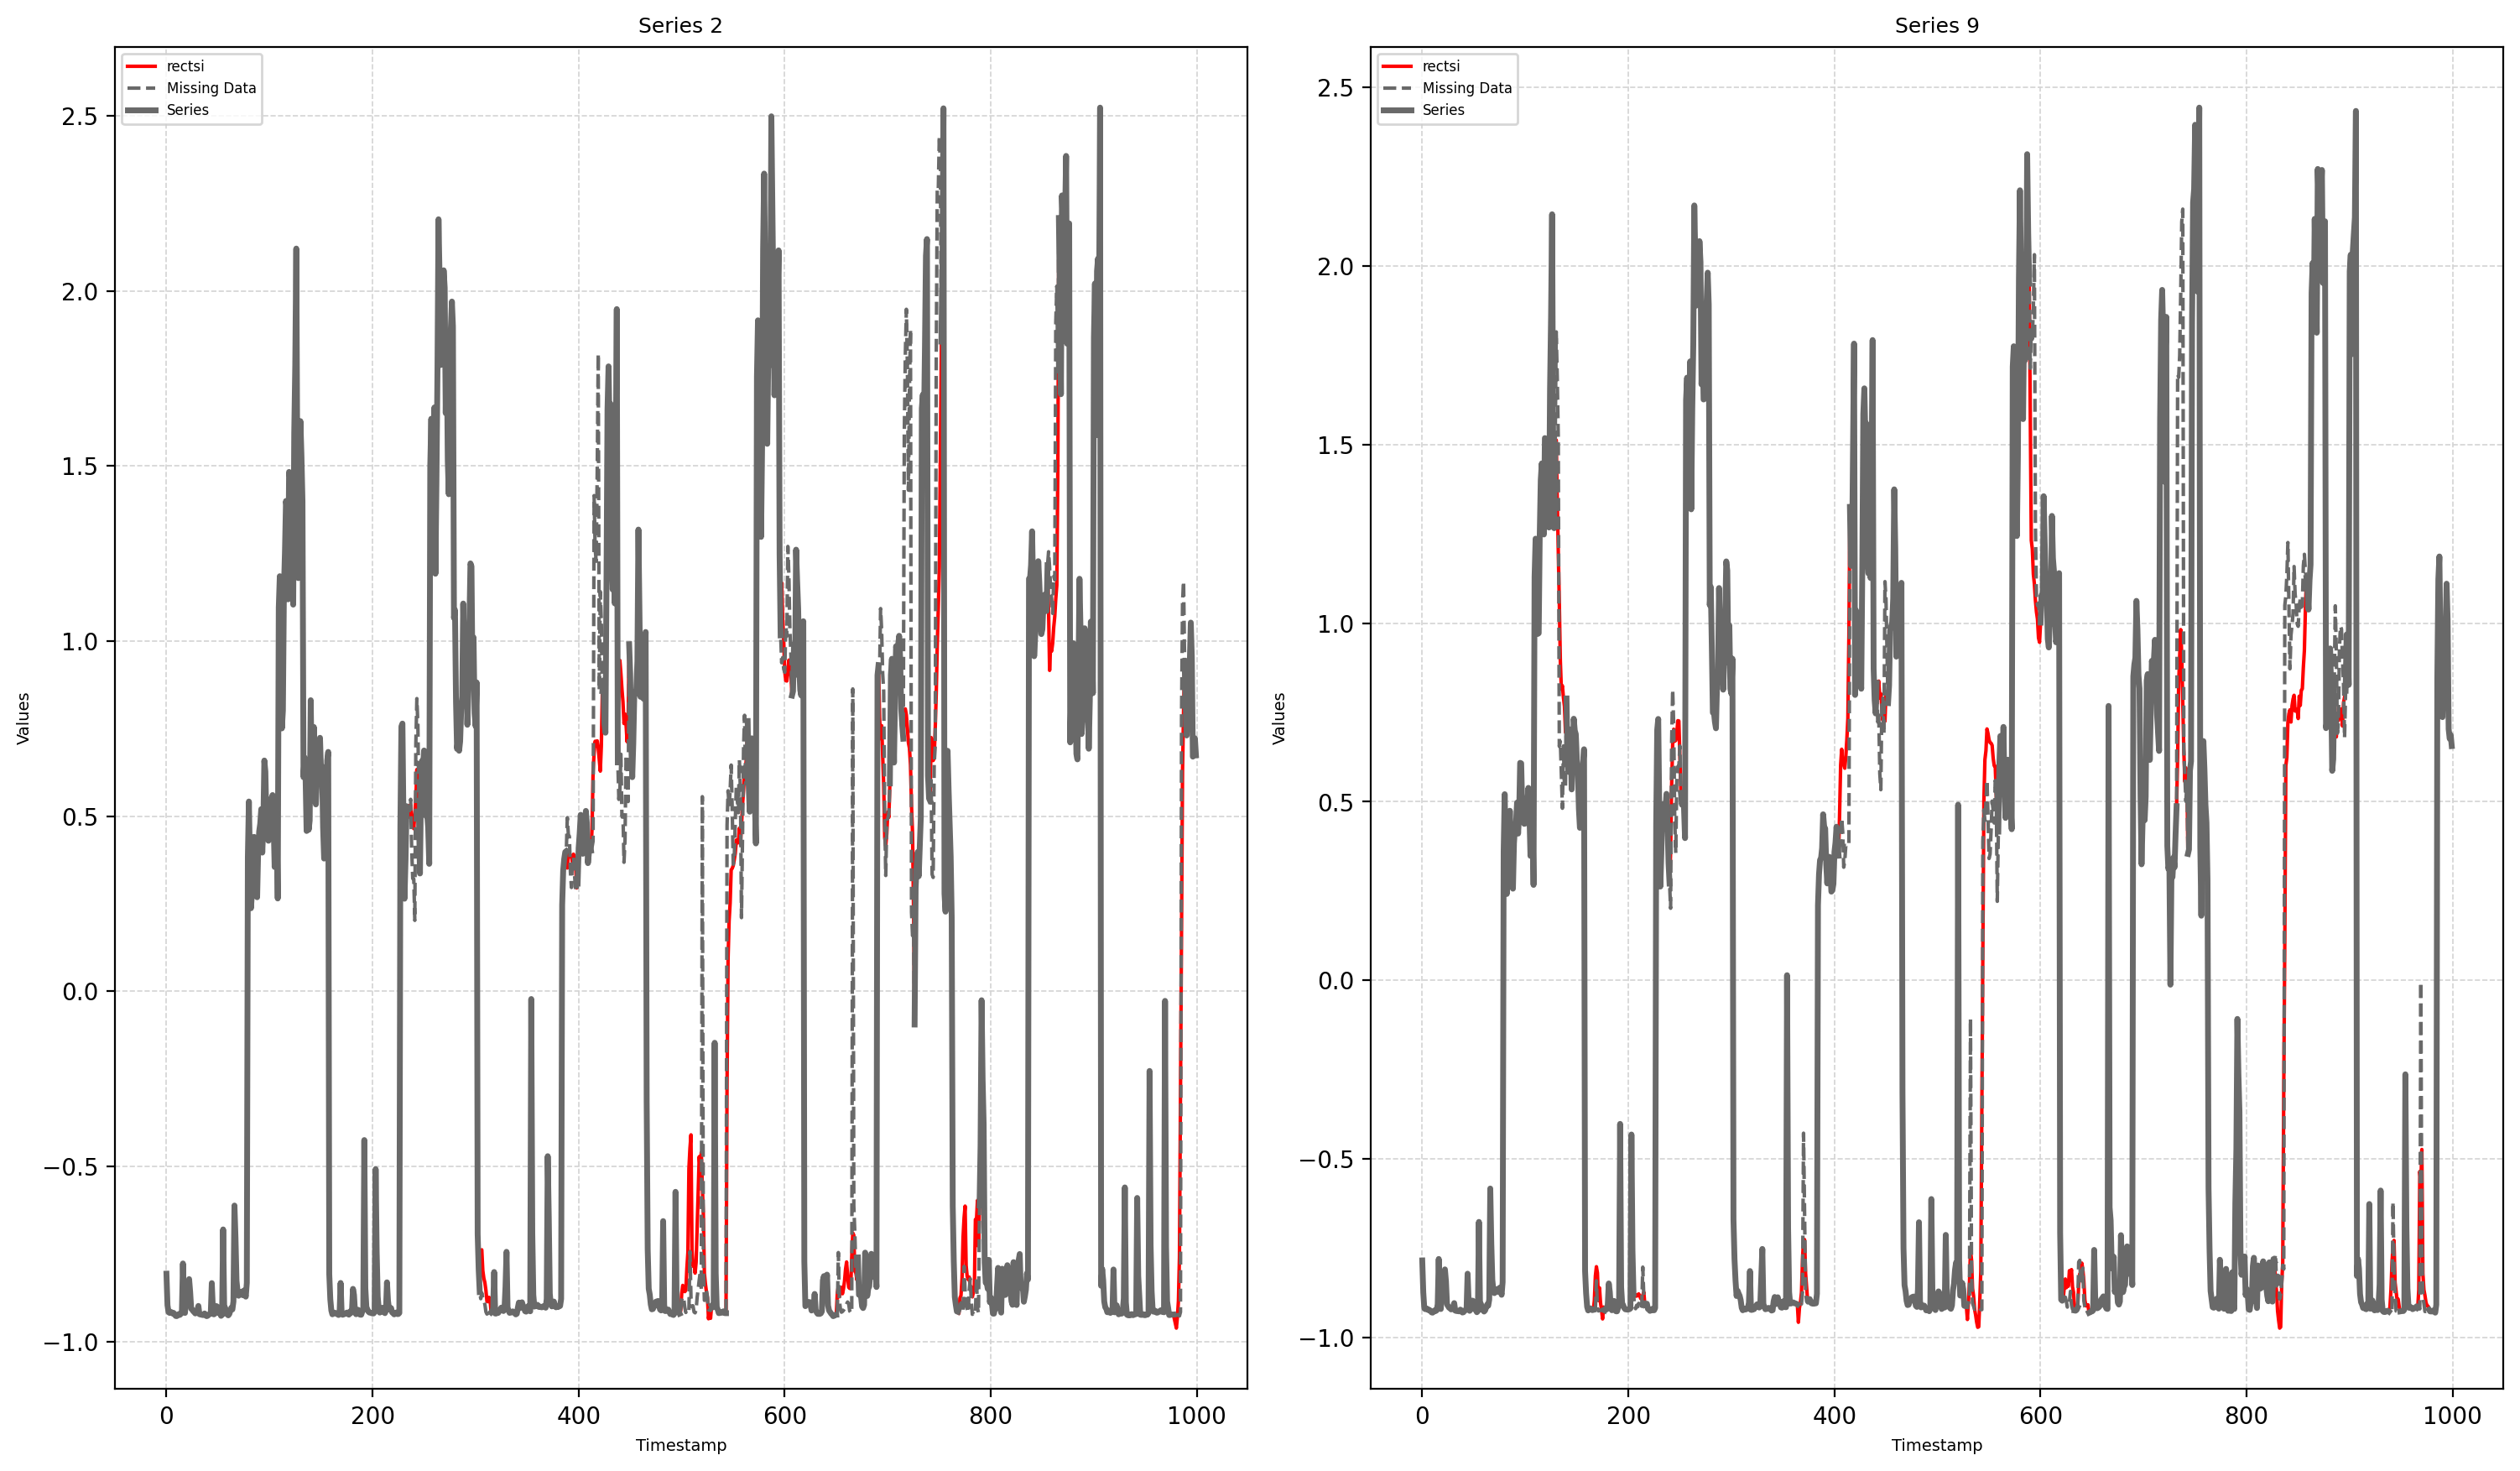

In [ ]:
imputer = Imputation.DeepLearning.RECTSI(ts_m, periodicity=24) # traffic dataset has daily periodicity (24 data points per day = hourly intervals)
imputer.impute()




Results :
RMSE                 = 0.33808474213951845
MAE                  = 0.2081487204313176
MI                   = 0.8562205283219311
CORRELATION          = 0.9420710627135689

plots saved in: ./imputegap_assets/imputation/26_01_09_14_07_39_rectsi_plot.jpg


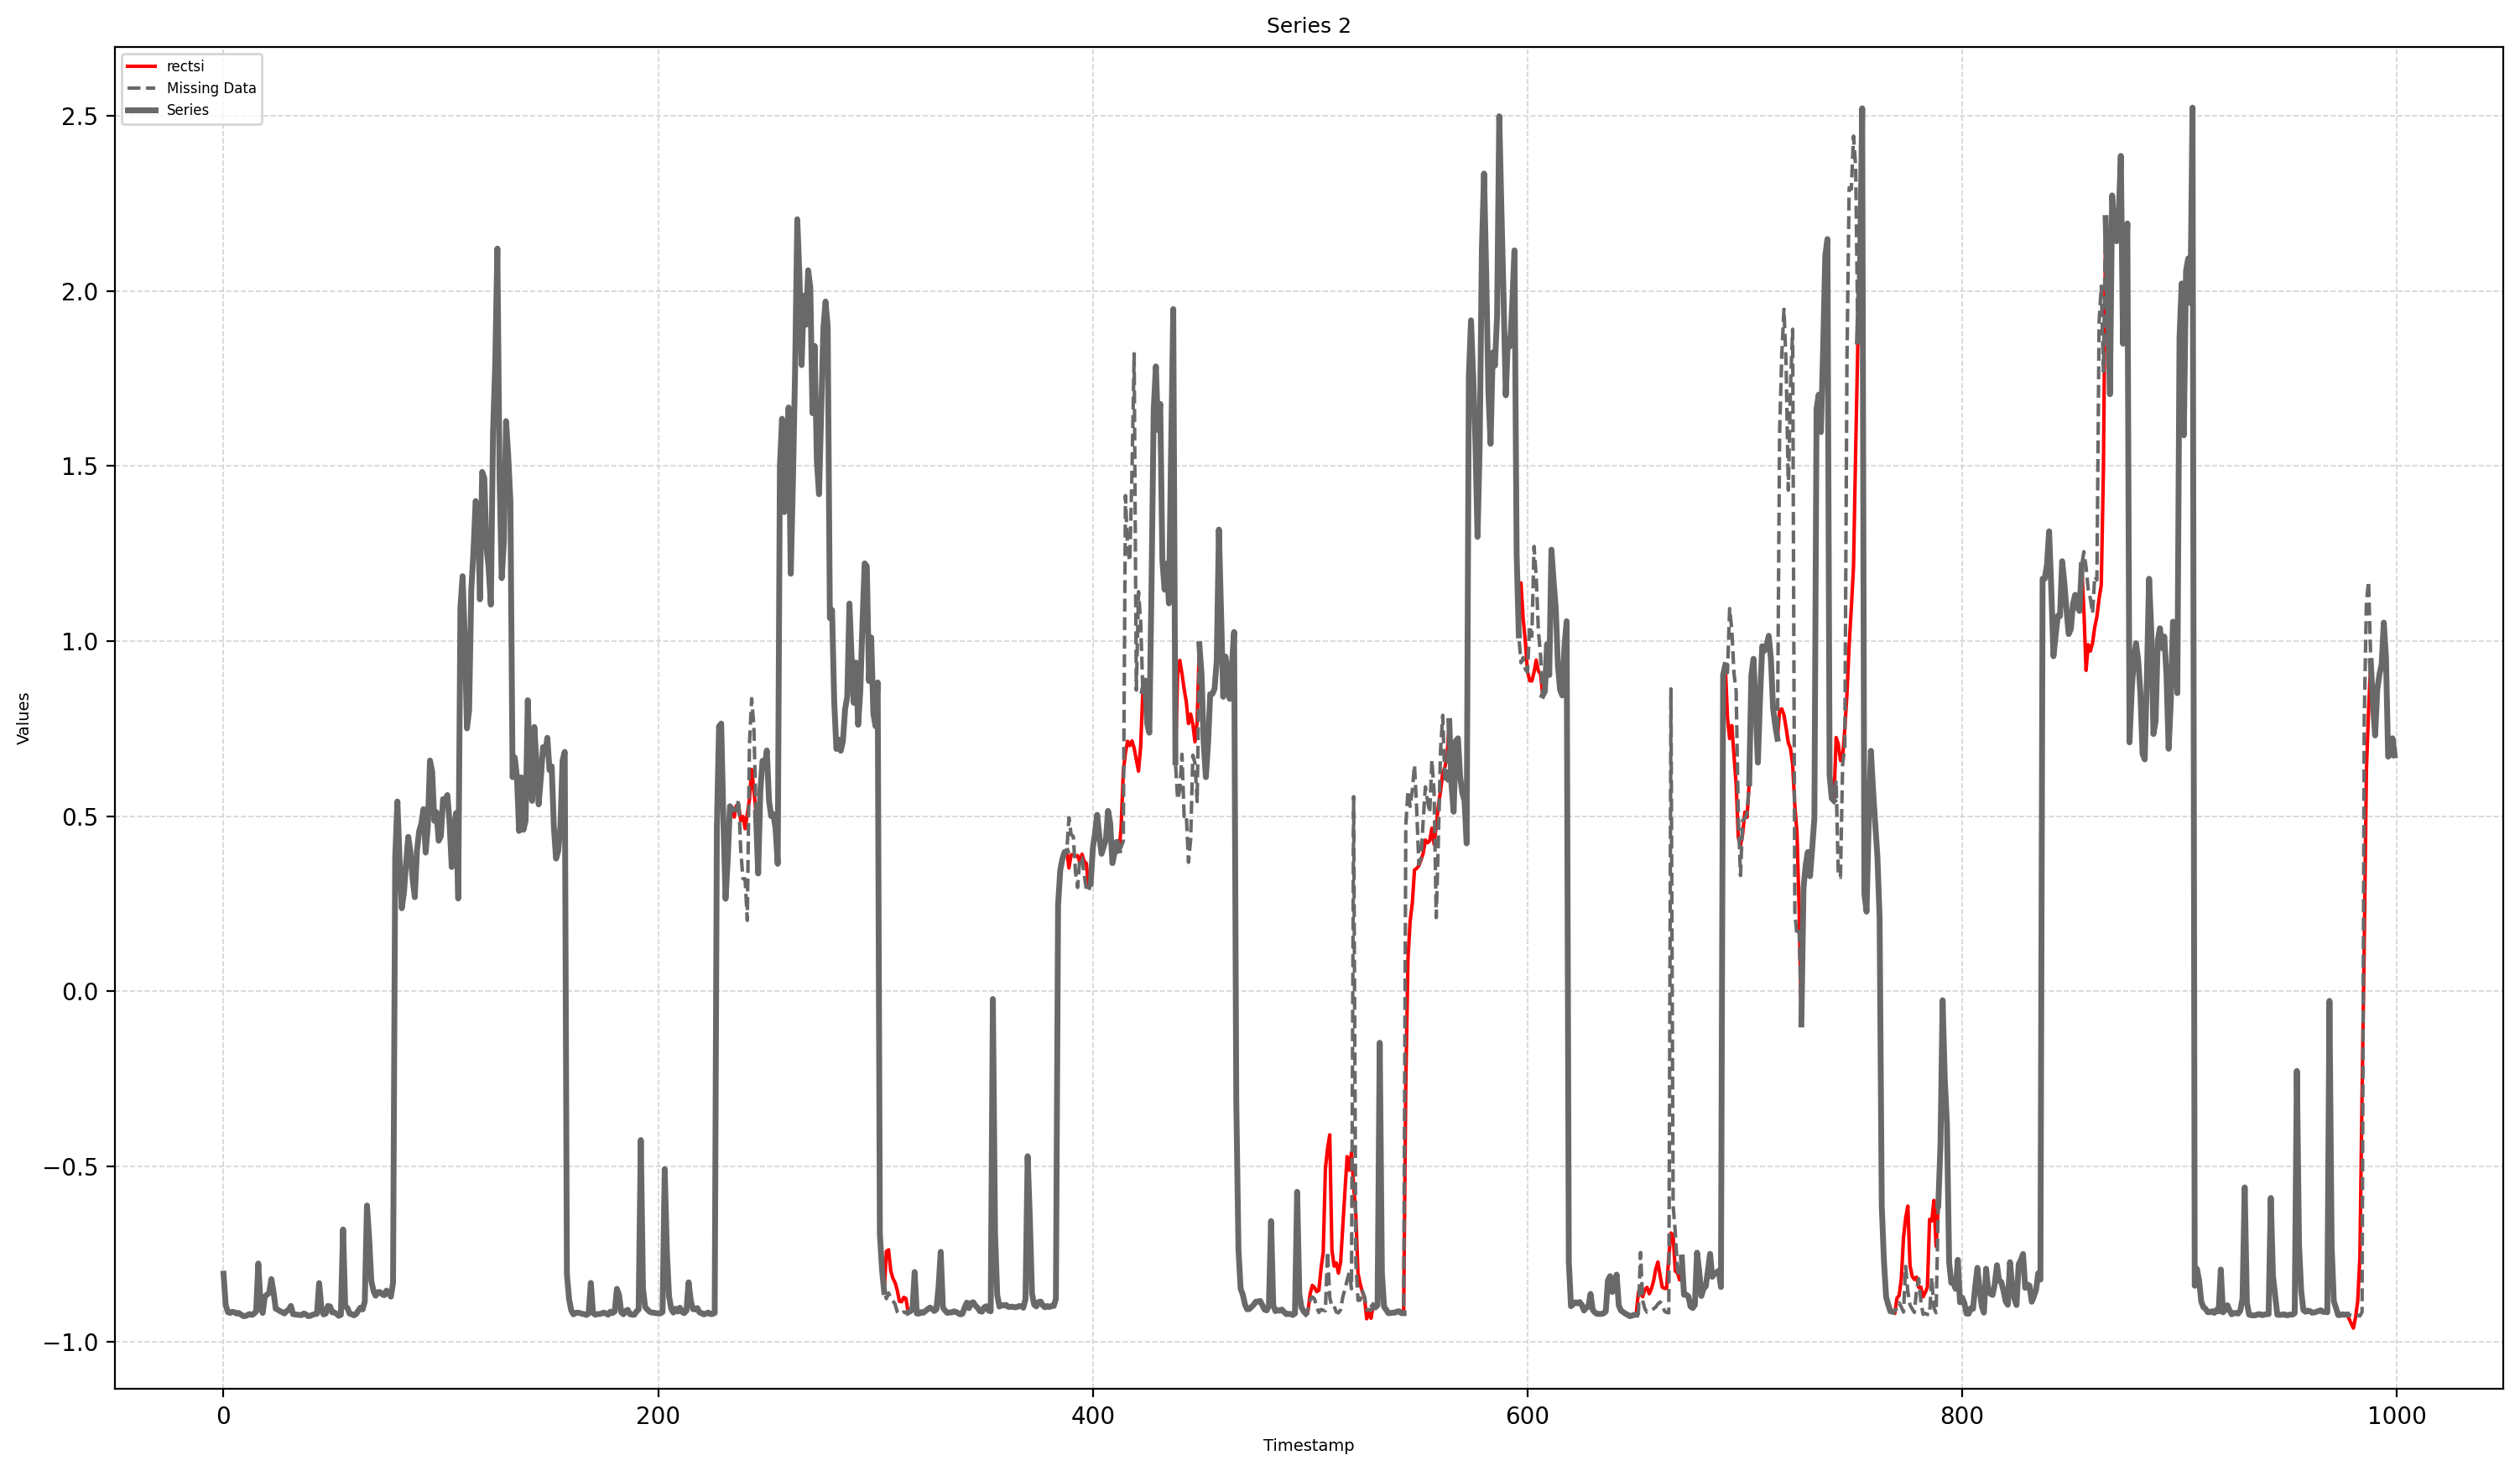

In [7]:
# compute and print the imputation metrics
imputer.score(ts.data, imputer.recov_data)
ts.print_results(imputer.metrics)

# plot the recovered time series
ts.plot(input_data=ts.data, incomp_data=ts_m, recov_data=imputer.recov_data, nbr_series=1, subplot=True, algorithm=imputer.algorithm, save_path="./imputegap_assets/imputation")
%matplotlib inline
ts.plots.show()

# 3.&nbsp;Benchmarking

Here for benchmarking, we will compare ReCTSi with other imputation algorithms implemented in ImputeGAP.

In [8]:
%matplotlib inline
from imputegap.recovery.benchmark import Benchmark

my_algorithms = ["CDRec", "ReCTSi", "GRIN", "MeanImpute"]

my_opt = ["default_params"]

my_datasets = ["airq"]

my_patterns = ["mcar"]

missing_rates = [0.05, 0.1]

my_metrics = ["RMSE", "MAE", "MI", "CORRELATION", "RUNTIME", "RUNTIME_LOG"]
algo_params ={"ReCTSi": {"periodicity": 24}}

# launch the evaluation
bench = Benchmark()
bench.eval(algorithms=my_algorithms, datasets=my_datasets, patterns=my_patterns, x_axis=missing_rates, metrics=my_metrics, optimizers=my_opt, algo_params=algo_params)


(SYS) The dataset is loaded from /Users/aleja/Desktop/DS/ImputeGAP/imputegap/datasets/airq.txt

CDRec is tested with mcar, started at 2026-01-09 14:09:06.


Seed set to 42
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


done!


ReCTSi is tested with mcar, started at 2026-01-09 14:09:08.
ffn group 1
ffn group 1
 skip


/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/aleja/Desktop/DS/ImputeGAP/imputegap/wrapper/AlgoPython/ReCTSi/logs/rectsi/2026-01-09_14-09-08_42 exists and is not empty.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pyto

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_mae          │    0.27631238102912903    │
│         test_mape         │    0.27631238102912903    │
│         test_mre          │     5.542891979217529     │
│         test_mse          │    0.27631238102912903    │
└───────────────────────────┴───────────────────────────┘

Seed set to 42
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


y_hat.shape = (1000, 10)
ffn group 1
ffn group 1
 skip


/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/aleja/Desktop/DS/ImputeGAP/imputegap/wrapper/AlgoPython/ReCTSi/logs/rectsi/2026-01-09_14-10-53_42 exists and is not empty.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pyto

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_mae          │    0.27793094515800476    │
│         test_mape         │    0.27793094515800476    │
│         test_mre          │     6.133187770843506     │
│         test_mse          │    0.27793094515800476    │
└───────────────────────────┴───────────────────────────┘

y_hat.shape = (1000, 10)
done!


GRIN is tested with mcar, started at 2026-01-09 14:12:40.


Seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/aleja/Desktop/DS/ImputeGAP/imputegap/wrapper/AlgoPython/GRIN/logs/grin/2026-01-09_14-12-40_42 exists and is not empty.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightnin

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6004952192306519     │
│         test_mae          │            0.0            │
│         test_mape         │            0.0            │
│         test_mre          │            0.0            │
│         test_mse          │            0.0            │
└───────────────────────────┴───────────────────────────┘

Seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


y_hat.shape = (10, 1000)


/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/aleja/Desktop/DS/ImputeGAP/imputegap/wrapper/AlgoPython/GRIN/logs/grin/2026-01-09_14-13-11_42 exists and is not empty.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/aleja/Desktop/DS/ImputeGAP/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider i

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6013707518577576     │
│         test_mae          │            0.0            │
│         test_mape         │            0.0            │
│         test_mre          │            0.0            │
│         test_mse          │            0.0            │
└───────────────────────────┴───────────────────────────┘

y_hat.shape = (10, 1000)
done!


MeanImpute is tested with mcar, started at 2026-01-09 14:13:42.
done!



> logs: benchmark - Execution Time: 276.9463 seconds


airq: {mcar, RMSE, default_params}

 Rate         CDRec                GRIN             MeanImpute            ReCTSi       

 0.05      0.1367211529        0.2664072107        0.8745323596        0.3317253046    
  0.1      0.1837896179        0.2344977292        0.8942813733        0.2642922826    



airq: {mcar, RUNTIME[ms], default_params}

 Rate         CDRec                GRIN             MeanImpute            ReCTSi       

 0.05    1290.0810241699     30886.7959976196      7.0571899414     105058.1078529358  
  0.1      9.0799331665      30550.1589775085      1.0000000000     106936.8152618408  



The plots have been generated...


The results are saved in :  ./imputegap_assets/benchmark/bench_26_01_09_14_09_06 



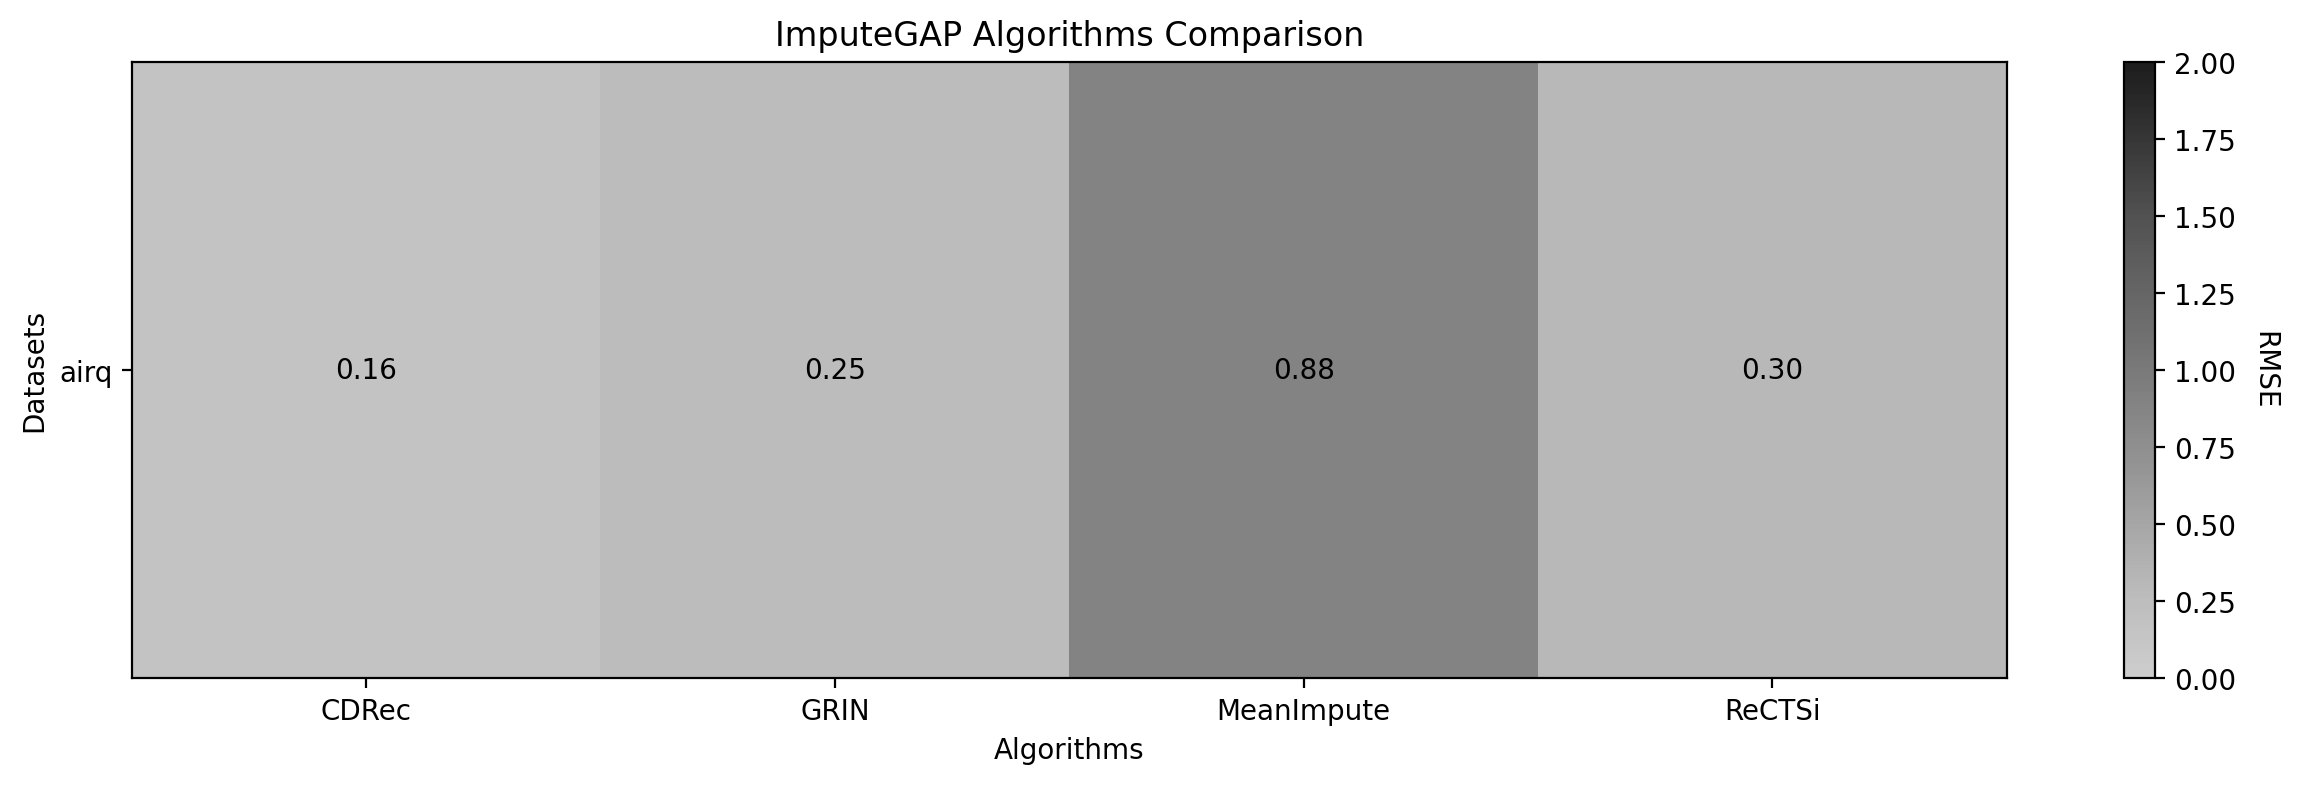

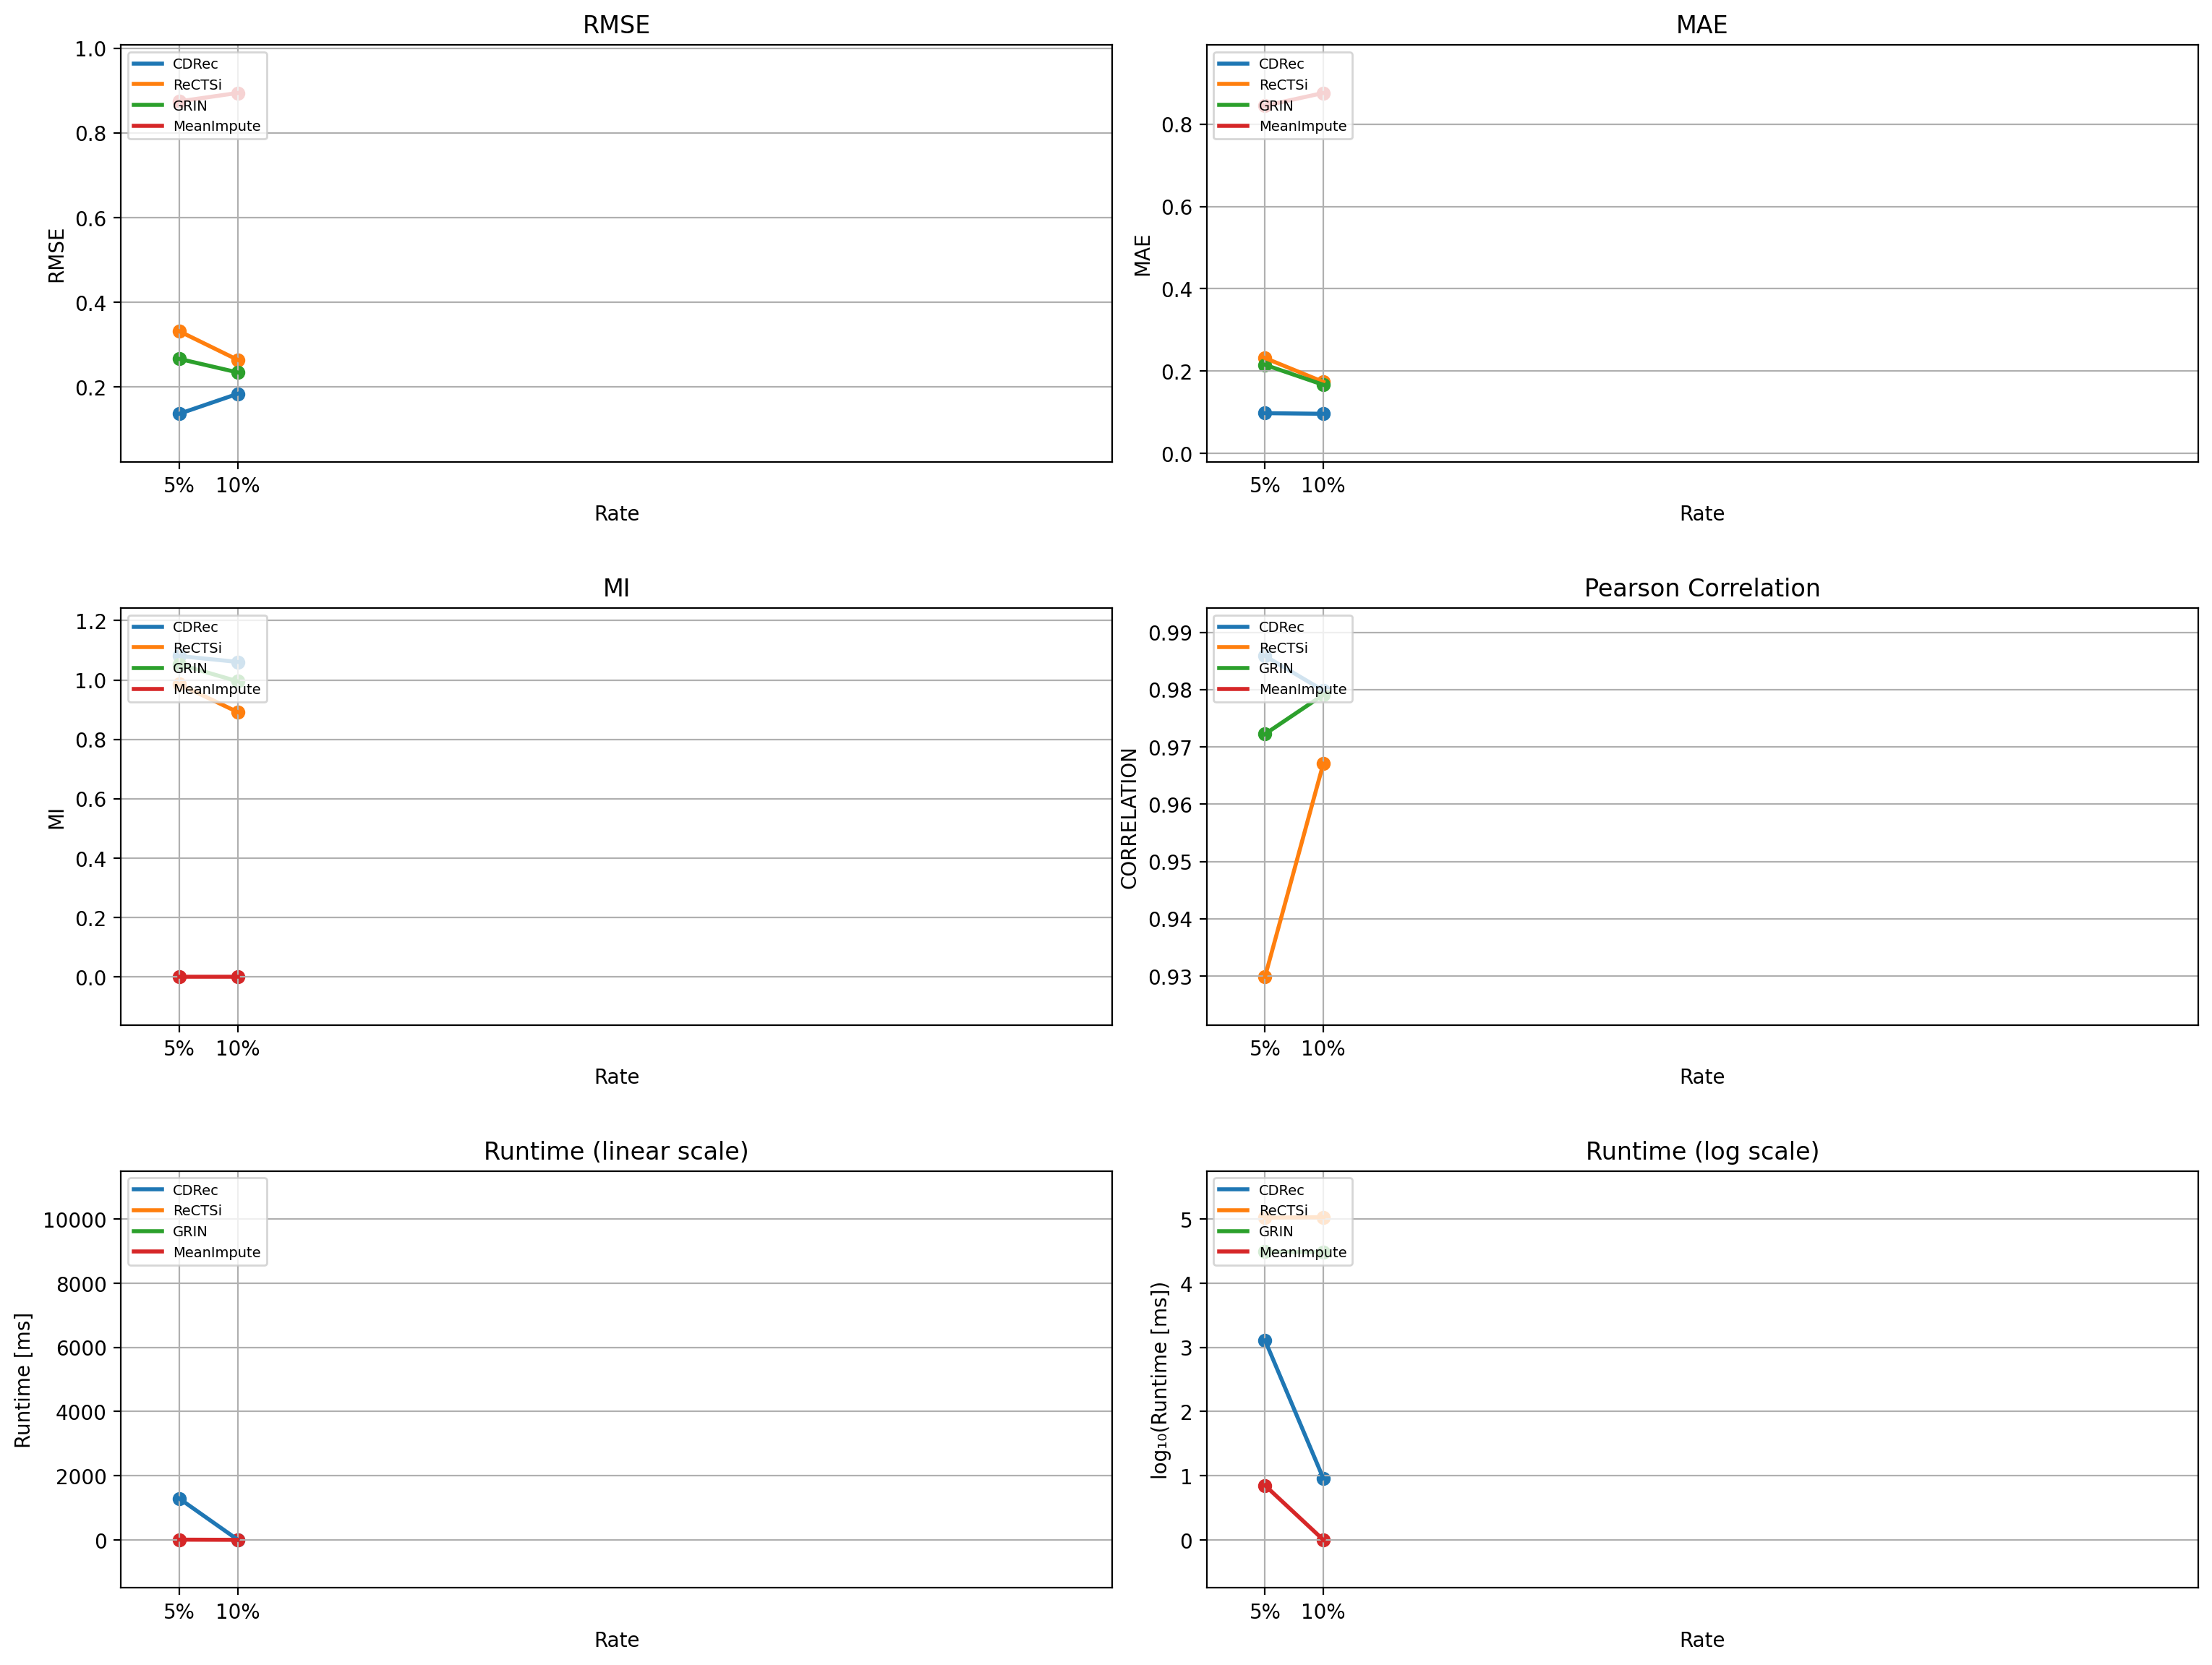

In [9]:
%matplotlib inline
bench.plots.show()

<br>


Now, let's see the result for a new pattern of contamination.

<br>


In [10]:
imputegap_jupyter(imputer.recov_data)

<br>


<br>


<br>

<br>
